In [1]:
import pandas as pd
import numpy as np
import NDCG as ndcg
import MHR as mhr
import sys
import types
ndcg.reload_package(mhr)
from sklearn.svm import SVR, LinearSVR
from sklearn.grid_search import GridSearchCV
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer
from time import time
%matplotlib inline

loading MHR


In [2]:
def pr_hs(r): 
    try:
        return ( 1 / r['pageRank'] ) + ( 1 / r['hits'] )
    except:
        return 0

def pr_len(r): 
    try:
        return ( 1 / r['pageRank'] ) + ( 1 / r['word_count'] )
    except:
        return 0
    
def hs_len(r): 
    try:
        return ( 1 / r['hits'] ) + ( 1 / r['word_count'] )
    except:
        return 0

def pr_hs_len(r): 
    try:
        return ( 1 / r['pr_hs'] ) + ( 1 / r['hs_len'] )
    except:
        return 0

In [3]:
reviews_features = pd.read_csv('data/eletronic_sample_counts.csv.gz')
#list_asin = ['B00BGA9WK2','B00A3YN0Z0','B0074BW614','B00CMQTVK0','B0094NY3R0','B0045FM6SU','B00DVFLJDS']
#reviews_features = reviews_features[reviews_features.asin.isin(list_asin)]
reviews_features.shape

(19756, 25)

In [4]:
reviews_features['pr_hs']=reviews_features.apply(pr_hs,axis=1)
reviews_features['pr_len']=reviews_features.apply(pr_len,axis=1)
reviews_features['hs_len']=reviews_features.apply(hs_len,axis=1)
reviews_features['pr_hs_len']=reviews_features.apply(pr_hs_len,axis=1)
#reviews_features.to_csv('data/eletronic_sample_counts.csv.gz', compression='gzip')
reviews_features.shape

(19756, 29)

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


pr_hs ndcg=0.475004895786
pr_len ndcg=0.472343549565
hs_len ndcg=0.476295599033
pr_hs_len ndcg=0.871843766276
PageRank ndcg=0.87155497918
HITs ndcg=0.871770213457
MHR ndcg=0.834078127094
MHRs ndcg=0.866295029108
383
383
383
383
383
383
383
383


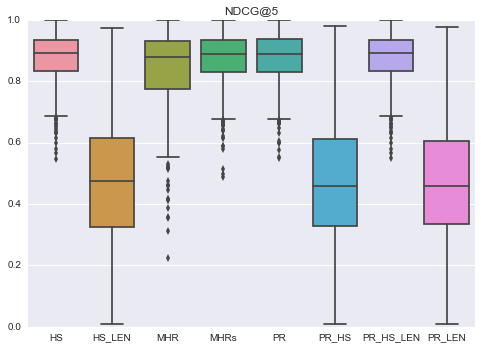

In [5]:
import seaborn as sns
k=5

ndcg_pr_hs=ndcg.calc_ndcg(reviews_features,'pr_hs',k) 
corr_pr_hs=ndcg.calc_corr(reviews_features,'pr_hs') 
print "pr_hs ndcg="+str(np.mean(ndcg_pr_hs))

ndcg_pr_len=ndcg.calc_ndcg(reviews_features,'pr_len',k) 
corr_pr_len=ndcg.calc_corr(reviews_features,'pr_len') 
print "pr_len ndcg="+str(np.mean(ndcg_pr_len))

ndcg_hs_len=ndcg.calc_ndcg(reviews_features,'hs_len',k) 
corr_hs_len=ndcg.calc_corr(reviews_features,'hs_len') 
print "hs_len ndcg="+str(np.mean(ndcg_hs_len))

ndcg_pr_hs_len=ndcg.calc_ndcg(reviews_features,'pr_hs_len',k) 
corr_pr_hs_len=ndcg.calc_corr(reviews_features,'pr_hs_len') 
print "pr_hs_len ndcg="+str(np.mean(ndcg_pr_hs_len))

ndcg_pr=ndcg.calc_ndcg(reviews_features,'pageRank',k) 
corr_pr=ndcg.calc_corr(reviews_features,'pageRank') 
print "PageRank ndcg="+str(np.mean(ndcg_pr))

ndcg_hs=ndcg.calc_ndcg(reviews_features,'hits',k) 
corr_hs=ndcg.calc_corr(reviews_features,'hits') 
print "HITs ndcg="+str(np.mean(ndcg_hs))

ndcg_mhr=ndcg.calc_ndcg(reviews_features,'powerWithStar',k) 
corr_mhr=ndcg.calc_corr(reviews_features,'powerWithStar') 
print "MHR ndcg="+str(np.mean(ndcg_mhr))

ndcg_mhrs=ndcg.calc_ndcg(reviews_features,'MHRs',k) 
corr_mhrs=ndcg.calc_corr(reviews_features,'MHRs') 
print "MHRs ndcg="+str(np.mean(ndcg_mhrs))

print (len(ndcg_pr_hs))
print (len(ndcg_pr_len))
print (len(ndcg_hs_len))
print (len(ndcg_pr_hs_len))
print (len(ndcg_hs))
print (len(ndcg_pr))
print (len(ndcg_mhr))
print (len(ndcg_mhrs))

tip={}
tip['PR_HS']=ndcg_pr_hs
tip['PR_LEN']=ndcg_pr_len
tip['HS_LEN']=ndcg_hs_len
tip['PR_HS_LEN']=ndcg_pr_hs_len
tip['HS']=ndcg_hs
tip['PR']=ndcg_pr
tip['MHR']=ndcg_mhr
tip['MHRs']=ndcg_mhrs
df = pd.DataFrame(tip)
ax = sns.boxplot(data=df)
#ax = sns.swarmplot(data=df, color=".25")
ax.set_title('NDCG@'+str(k))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

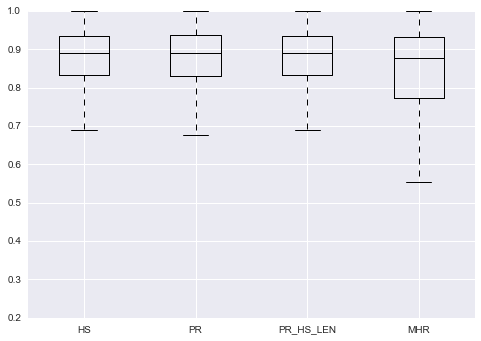

In [7]:
import matplotlib.pyplot as plt 
data_to_plot = [ndcg_hs, ndcg_pr, ndcg_pr_hs_len, ndcg_mhr]


bp = plt.boxplot(data_to_plot, labels=["HS","PR","PR_HS_LEN","MHR"])
plt.setp(bp['boxes'], linewidth=1, color='black')
plt.setp(bp['fliers'], linewidth=1, color='black')
plt.setp(bp['medians'], linewidth=1, color='black')
plt.setp(bp['whiskers'], linewidth=1, color='black')

In [8]:
ndcg_pr_hs_len=ndcg.calc_ndcg(reviews_features,'pr_hs_len',1) 
print "pr_hs_len ndcg 1="+str(np.mean(ndcg_pr_hs_len))
ndcg_pr_hs_len=ndcg.calc_ndcg(reviews_features,'pr_hs_len',3) 
print "pr_hs_len ndcg 3="+str(np.mean(ndcg_pr_hs_len))
ndcg_pr_hs_len=ndcg.calc_ndcg(reviews_features,'pr_hs_len',5) 
print "pr_hs_len ndcg 5="+str(np.mean(ndcg_pr_hs_len))

pr_hs_len ndcg 1=0.874340791932
pr_hs_len ndcg 3=0.873254288365
pr_hs_len ndcg 5=0.871843766276
